In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D, BatchNormalization, Activation
from keras.models import Model, Input
from keras.optimizers import Adam
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
Images=np.load('gdrive/My Drive/test_data/Images.npy')
Blurry=np.load('gdrive/My Drive/test_data/Blurry.npy')

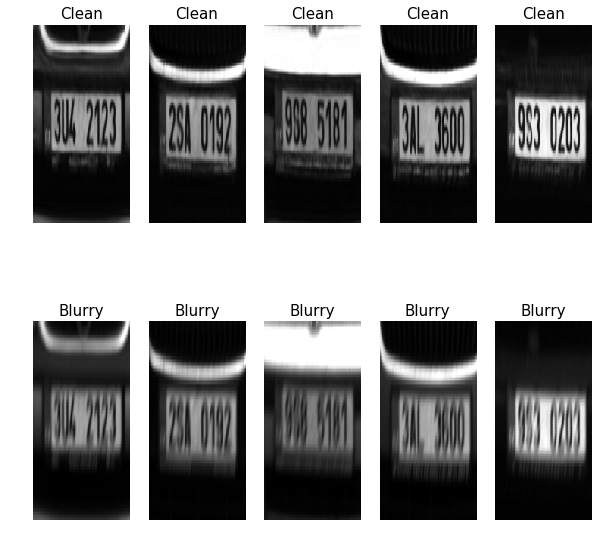

In [5]:
f, ax = plt.subplots(2,5,figsize=(10,10))
for i in range(5):
    ax[0,i].imshow(Images[i].astype('uint8'),cmap='gray');  ax[0,i].axis('Off'); ax[0,i].set_title('Clean', size=15)
    ax[1,i].imshow(Blurry[i].astype('uint8'),cmap='gray');  ax[1,i].axis('Off'); ax[1,i].set_title('Blurry', size=15)
plt.show()

In [6]:
Imginput = Input(shape=(264,128,3))

l1 = Conv2D(filters=128, kernel_size=19, strides = 1, padding='same')(Imginput)
l1 = BatchNormalization()(l1)
l1 = Activation('relu')(l1)

l2 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(l1)
l2 = BatchNormalization()(l2)
l2 = Activation('relu')(l2)

l3 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(l2)
l3 = BatchNormalization()(l3)
l3 = Activation('relu')(l3)

l4 = Conv2D(filters=320, kernel_size=1, strides = 1, padding='same')(l3)
l4 = BatchNormalization()(l4)
l4 = Activation('relu')(l4)

l5 = Conv2D(filters=128, kernel_size=1, strides = 1, padding='same')(l4)
l5 = BatchNormalization()(l5)
l5 = Activation('relu')(l5)

l6 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(l5)
l6 = BatchNormalization()(l6)
l6 = Activation('relu')(l6)

l7 = Conv2D(filters=512, kernel_size=1, strides = 1, padding='same')(l6)
l7 = BatchNormalization()(l7)
l7 = Activation('relu')(l7)

l8 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(l7)
l8 = BatchNormalization()(l8)
l8 = Activation('relu')(l8)

l9 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(l8)
l9 = BatchNormalization()(l9)
l9 = Activation('relu')(l9)

l10 = Conv2D(filters=128, kernel_size=3, strides = 1, padding='same')(l9)
l10 = BatchNormalization()(l10)
l10 = Activation('relu')(l10)

l11 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(l10)
l11 = BatchNormalization()(l11)
l11 = Activation('relu')(l11)

l12 = Conv2D(filters=128, kernel_size=5, strides = 1, padding='same')(l11)
l12 = BatchNormalization()(l12)
l12 = Activation('relu')(l12)

l13 = Conv2D(filters=256, kernel_size=1, strides = 1, padding='same')(l12)
l13 = BatchNormalization()(l13)
l13 = Activation('relu')(l13)

l14 = Conv2D(filters=64, kernel_size=7, strides = 1, padding='same')(l13)
l14 = BatchNormalization()(l14)
l14 = Activation('relu')(l14)

Imgoutput = Conv2D(filters=3, kernel_size=7, strides = 1, padding='same', activation='relu')(l14)

model = Model(inputs= Imginput, outputs=Imgoutput )

W0720 10:04:51.879122 140371812181888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 10:04:51.896324 140371812181888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 10:04:51.899989 140371812181888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0720 10:04:51.927586 140371812181888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0720 10:04:51.929943 1403718121

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 264, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 264, 128, 128)     138752    
_________________________________________________________________
batch_normalization_1 (Batch (None, 264, 128, 128)     512       
_________________________________________________________________
activation_1 (Activation)    (None, 264, 128, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 264, 128, 320)     41280     
_________________________________________________________________
batch_normalization_2 (Batch (None, 264, 128, 320)     1280      
_________________________________________________________________
activation_2 (Activation)    (None, 264, 128, 320)     0         
__________

In [0]:
adam = Adam()
def train(batch_size, epoch_num):
  model.compile(optimizer= adam, loss= 'mean_squared_error')
  model.fit(Blurry[72:648], Images[72:648], epochs=epoch_num, validation_data=(Blurry[648:721], Images[648:721]), batch_size=batch_size)
 

In [0]:
#model.save_weights('gdrive/My Drive/My_deblur_cnn_weights.h5', True)

In [10]:
train(1,10)

Train on 576 samples, validate on 73 samples
Epoch 1/10
576/576 [==============================] - 182s 316ms/step - loss: 1442.4799 - val_loss: 1044.0463
Epoch 2/10
576/576 [==============================] - 181s 315ms/step - loss: 869.5451 - val_loss: 815.0264
Epoch 3/10
576/576 [==============================] - 181s 315ms/step - loss: 716.8896 - val_loss: 1211.7014
Epoch 4/10
576/576 [==============================] - 181s 315ms/step - loss: 603.6786 - val_loss: 880.1279
Epoch 5/10
576/576 [==============================] - 181s 315ms/step - loss: 488.9074 - val_loss: 697.1596
Epoch 6/10
576/576 [==============================] - 182s 315ms/step - loss: 434.0322 - val_loss: 676.0637
Epoch 7/10
576/576 [==============================] - 182s 315ms/step - loss: 379.2566 - val_loss: 600.0596
Epoch 8/10
576/576 [==============================] - 181s 315ms/step - loss: 344.7961 - val_loss: 556.2772
Epoch 9/10
576/576 [==============================] - 182s 315ms/step - loss: 351.2380 -

In [0]:
#model.load_weights('gdrive/My Drive/My_deblur_cnn_weights.h5')
Deblurred = model.predict(Blurry[0:5])

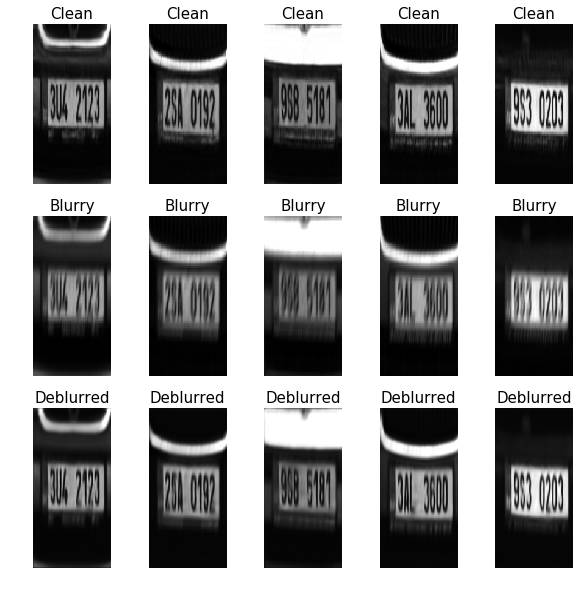

In [14]:
Deblurred = np.clip(Deblurred, 0, 255)
f, ax = plt.subplots(3,5, figsize=(10,10))
for i in range(5):
    ax[0,i].imshow(Images[i].astype('uint8'),cmap='gray');  ax[0,i].axis('Off'); ax[0,i].set_title('Clean', size=15)
    ax[1,i].imshow(Blurry[i].astype('uint8'),cmap='gray');  ax[1,i].axis('Off'); ax[1,i].set_title('Blurry', size=15)
    ax[2,i].imshow(Deblurred[i].astype('uint8'),cmap='gray');  ax[2,i].axis('Off'); ax[2,i].set_title('Deblurred', size=15)
plt.show()

In [0]:
import math
def psnr(img, ref):
    #convert imput images to int
    _img = np.float64(np.copy(img))
    _ref = np.float64(np.copy(ref))
    mse = np.mean((_img - _ref) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 10 * math.log10((PIXEL_MAX)**2 / math.sqrt(mse))

In [18]:
P=0
N=0
for i in range(0,5):
   N=N+psnr(Images[i],Blurry[i])
   P=P+psnr(Images[i],Deblurred[i])
   #print(N,P)
P=P/72
N=N/72
print('PSNR between Image and Blurry',N,'\n PSNR between Image and Deblurred',P)

PSNR between Image and Blurry 2.4798732641612307 
 PSNR between Image and Deblurred 2.622273237326665


In [0]:
from skimage.measure import compare_ssim as ssim
import tensorflow as tf
ssim_n=0
ssim_p=0
for i in range(0,72):
    ssim_n =ssim_n+ ssim(Images[i],Blurry[i],multichannel=True)
    ssim_p =ssim_p+ ssim(Images[i],Deblurred[i],multichannel=True)
    #print(ssim_n,ssim_p)
ssim_n=ssim_n/72
ssim_p=ssim_p/72
print('SSIM between Image and Blurry',ssim_n,'\n SSIM between Image and Deblurred',ssim_p)